<a href="https://colab.research.google.com/github/hhh6593/TIL/blob/master/pytorch_chap_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from torchvision import transforms, datasets

In [27]:
batch_size = 32
epochs = 10

In [16]:
train_dataset = datasets.MNIST(root='../data/MNIST',
                               train = True,
                               download = True,
                               transform = transforms.ToTensor())
test_dataset = datasets.MNIST(root='../data/MNIST',
                               train = False,
                               download = True,
                               transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = False)

In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc1 = nn.Linear(512, 256)
        self.fc1 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x

In [18]:
model = Net().to()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

model

Net(
  (fc1): Linear(in_features=256, out_features=10, bias=True)
)

In [30]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
            pred = model(X)
            loss = loss_fn(pred, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if batch % 100 == 0:
                loss, current = loss.item(), batch * len(X)
                print('loss: {0:.4f}, [{1}/{2}]'.format(loss, current, size))

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
  
    test_loss /= size
    correct /= size
    print('Test Error: \n Accuracy: {0:.4f}  Avg loss: {1:.4f}'.format(correct, test_loss))

In [21]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__inif__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc1 = nn.Linear(512, 256)
        self.fc1 = nn.Linear(256, 10)
        self.dropout_prob = 0.5

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob) #self.training - 학습 , 검증 상태에 따라 다르게 적용되기 위해 존재하는 파라미터
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x

In [25]:
#ReLu 활성화 함수
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout_prob = 0.5

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = F.relu(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob)
        x = self.fc2(x)
        x = F.relu(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x

In [31]:
epochs = 30
learning_rate = 0.1

model = Net()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


for t in range(epochs):
    print('\nEpochs {} \n ==========================='.format(t+1))
    train_loop(train_loader, model, loss_fn, optimizer)
    test_loop(test_loader, model, loss_fn)


Epochs 1 
loss: 2.3151, [0/60000]
loss: 0.7897, [2800/60000]
loss: 0.7491, [5600/60000]
loss: 0.6009, [8400/60000]
loss: 0.5818, [11200/60000]
loss: 0.2833, [14000/60000]
loss: 0.4249, [16800/60000]
loss: 0.4065, [19600/60000]
loss: 0.0777, [22400/60000]
loss: 0.4880, [25200/60000]
loss: 0.0749, [28000/60000]
loss: 0.3791, [30800/60000]
loss: 0.1726, [33600/60000]
loss: 0.3342, [36400/60000]
loss: 0.6664, [39200/60000]
loss: 0.2494, [42000/60000]
loss: 0.3231, [44800/60000]
loss: 0.2269, [47600/60000]
loss: 0.1389, [50400/60000]
loss: 0.1714, [53200/60000]
loss: 0.4941, [56000/60000]
loss: 0.5480, [58800/60000]
Test Error: 
 Accuracy: 0.9340  Avg loss: 0.0080

Epochs 2 
loss: 0.1758, [0/60000]
loss: 0.0233, [2800/60000]
loss: 0.2046, [5600/60000]
loss: 0.1077, [8400/60000]
loss: 0.3735, [11200/60000]
loss: 0.1482, [14000/60000]
loss: 0.2709, [16800/60000]
loss: 0.2489, [19600/60000]
loss: 0.2392, [22400/60000]
loss: 0.3465, [25200/60000]
loss: 0.2153, [28000/60000]
loss: 0.1097, [3080

In [32]:
#배치 정규화
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout_prob = 0.5
        self.batch_norm1 = nn.BatchNorm1d(512)
        self.batch_norm2 = nn.BatchNorm1d(256)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = self.batch_norm1(x)
        x = F.relu(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob)
        x = self.fc2(x)
        x = self.batch_norm2(x)
        x = F.relu(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x

In [34]:
epochs = 10
learning_rate = 0.1

model = Net()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


for t in range(epochs):
    print('\nEpochs {} \n ==========================='.format(t+1))
    train_loop(train_loader, model, loss_fn, optimizer)
    test_loop(test_loader, model, loss_fn)


Epochs 1 
loss: 2.3138, [0/60000]
loss: 0.3248, [2800/60000]
loss: 0.9194, [5600/60000]
loss: 0.4356, [8400/60000]
loss: 0.2333, [11200/60000]
loss: 0.3752, [14000/60000]
loss: 0.5122, [16800/60000]
loss: 0.3737, [19600/60000]
loss: 0.7221, [22400/60000]
loss: 0.3953, [25200/60000]
loss: 0.7709, [28000/60000]
loss: 0.2034, [30800/60000]
loss: 0.1752, [33600/60000]
loss: 0.2758, [36400/60000]
loss: 0.1239, [39200/60000]
loss: 0.1284, [42000/60000]
loss: 0.3241, [44800/60000]
loss: 0.4295, [47600/60000]
loss: 0.2082, [50400/60000]
loss: 0.0923, [53200/60000]
loss: 0.3426, [56000/60000]
loss: 0.5011, [58800/60000]
Test Error: 
 Accuracy: 0.9304  Avg loss: 0.0085

Epochs 2 
loss: 0.3348, [0/60000]
loss: 0.1185, [2800/60000]
loss: 0.2010, [5600/60000]
loss: 0.5104, [8400/60000]
loss: 0.2338, [11200/60000]
loss: 1.0943, [14000/60000]
loss: 0.1707, [16800/60000]
loss: 0.2032, [19600/60000]
loss: 0.4305, [22400/60000]
loss: 0.2027, [25200/60000]
loss: 0.1998, [28000/60000]
loss: 0.3610, [3080

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms, datasets

In [40]:
train_dataset = datasets.FashionMNIST(root = "../data/FashionMNIST",
                                       train = True,
                                       download = True,
                                       transform = transforms.ToTensor())
                                       
test_dataset = datasets.FashionMNIST(root = "../data/FashionMNIST",
                                       train = False,
                                       transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = batch_size,
                                          shuffle = False)


Extracting ../data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/FashionMNIST/raw




Extracting ../data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/FashionMNIST/raw




Extracting ../data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/FashionMNIST/raw




Extracting ../data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/FashionMNIST/raw

Processing...
Done!


In [41]:
#데이터 확인하기
for (x_train, y_train) in train_loader:
    print('x_train:', x_train.size(), 'type:', x_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

x_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


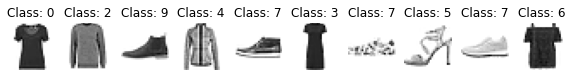

In [44]:
pltsize = 1
plt.figure(figsize = (10 * pltsize, pltsize))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.axis('off')
    plt.imshow(x_train[i, :, :, :].numpy().reshape(28,28), cmap='gray_r')
    plt.title('Class: ' + str(y_train[i].item()))

In [84]:
#오토 인코더 모델 설계하기
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 32),)
        
        self.decoder = nn.Sequential(
            nn.Linear(32, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 28*28),)
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [85]:
#optimizer 설정
model = AE()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

print(model)

AE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=32, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=32, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=784, bias=True)
  )
)


In [89]:
#AE 모델 학습을 진행하며 학습 데이터에 대한 모델 성능을 확인하는 함수 정의
def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, _) in enumerate(train_loader):
        image = image.view(-1, 28*28)
        target = image.view(-1, 28*28)
        optimizer.zero_grad()
        encoded, decoded = model(image)
        loss = criterion(decoded, target)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{}({:.0f}%)]\tTrain Loss: {:.6f}'.format(epochs, batch_idx * len(image), len(train_loader.dataset), 100. * batch_idx / len(train_loader), loss.item()))

In [91]:
#학습되는 과정 속에서 검증 데이터에 대한 모델 성능을 확인하는 함수 정의
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    real_image = []
    gen_image = []
    with torch.no_grad():
        for image, _ in test_loader:
            image = image.view(-1, 28*28)
            target = image.view(-1, 28*28)
            encoded, decoded = model(image)

            test_loss += criterion(decoded, image).item()
            real_image.append(image.to('cpu'))
            gen_image.append(decoded.to('cpu'))
    
    test_loss /= len(test_loader.dataset)
    return test_loss, real_image, gen_image

Train Epoch: 10 [0/60000(0%)]	Train Loss: 0.013267
Train Epoch: 10 [6400/60000(11%)]	Train Loss: 0.012302
Train Epoch: 10 [12800/60000(21%)]	Train Loss: 0.011867
Train Epoch: 10 [19200/60000(32%)]	Train Loss: 0.011869
Train Epoch: 10 [25600/60000(43%)]	Train Loss: 0.011705
Train Epoch: 10 [32000/60000(53%)]	Train Loss: 0.013118
Train Epoch: 10 [38400/60000(64%)]	Train Loss: 0.012320
Train Epoch: 10 [44800/60000(75%)]	Train Loss: 0.012271
Train Epoch: 10 [51200/60000(85%)]	Train Loss: 0.010716
Train Epoch: 10 [57600/60000(96%)]	Train Loss: 0.011657

[EPOCH : 1], 	Test Loss: 0.0004


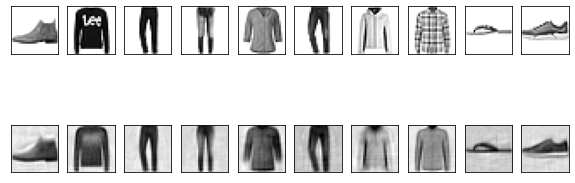

Train Epoch: 10 [0/60000(0%)]	Train Loss: 0.012688
Train Epoch: 10 [6400/60000(11%)]	Train Loss: 0.013059
Train Epoch: 10 [12800/60000(21%)]	Train Loss: 0.011615
Train Epoch: 10 [19200/60000(32%)]	Train Loss: 0.011000
Train Epoch: 10 [25600/60000(43%)]	Train Loss: 0.009972
Train Epoch: 10 [32000/60000(53%)]	Train Loss: 0.011582
Train Epoch: 10 [38400/60000(64%)]	Train Loss: 0.012111
Train Epoch: 10 [44800/60000(75%)]	Train Loss: 0.011408
Train Epoch: 10 [51200/60000(85%)]	Train Loss: 0.013394
Train Epoch: 10 [57600/60000(96%)]	Train Loss: 0.011618

[EPOCH : 2], 	Test Loss: 0.0004


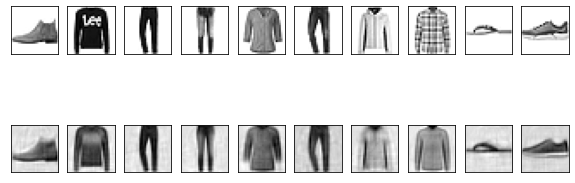

Train Epoch: 10 [0/60000(0%)]	Train Loss: 0.010098
Train Epoch: 10 [6400/60000(11%)]	Train Loss: 0.012167
Train Epoch: 10 [12800/60000(21%)]	Train Loss: 0.009319
Train Epoch: 10 [19200/60000(32%)]	Train Loss: 0.011483
Train Epoch: 10 [25600/60000(43%)]	Train Loss: 0.010986
Train Epoch: 10 [32000/60000(53%)]	Train Loss: 0.011016
Train Epoch: 10 [38400/60000(64%)]	Train Loss: 0.008688
Train Epoch: 10 [44800/60000(75%)]	Train Loss: 0.009165
Train Epoch: 10 [51200/60000(85%)]	Train Loss: 0.010775
Train Epoch: 10 [57600/60000(96%)]	Train Loss: 0.014340

[EPOCH : 3], 	Test Loss: 0.0003


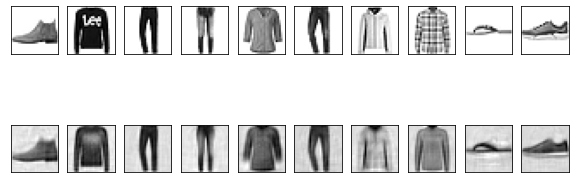

Train Epoch: 10 [0/60000(0%)]	Train Loss: 0.009440
Train Epoch: 10 [6400/60000(11%)]	Train Loss: 0.010693
Train Epoch: 10 [12800/60000(21%)]	Train Loss: 0.011039
Train Epoch: 10 [19200/60000(32%)]	Train Loss: 0.009493
Train Epoch: 10 [25600/60000(43%)]	Train Loss: 0.009413
Train Epoch: 10 [32000/60000(53%)]	Train Loss: 0.009365
Train Epoch: 10 [38400/60000(64%)]	Train Loss: 0.009809
Train Epoch: 10 [44800/60000(75%)]	Train Loss: 0.009190
Train Epoch: 10 [51200/60000(85%)]	Train Loss: 0.010004
Train Epoch: 10 [57600/60000(96%)]	Train Loss: 0.009938

[EPOCH : 4], 	Test Loss: 0.0003


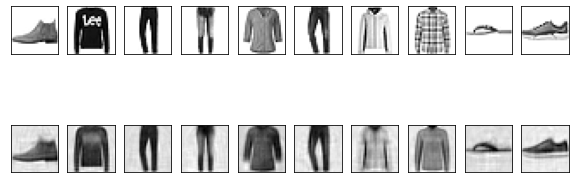

Train Epoch: 10 [0/60000(0%)]	Train Loss: 0.011675
Train Epoch: 10 [6400/60000(11%)]	Train Loss: 0.010117
Train Epoch: 10 [12800/60000(21%)]	Train Loss: 0.009288
Train Epoch: 10 [19200/60000(32%)]	Train Loss: 0.010137
Train Epoch: 10 [25600/60000(43%)]	Train Loss: 0.009016
Train Epoch: 10 [32000/60000(53%)]	Train Loss: 0.008692
Train Epoch: 10 [38400/60000(64%)]	Train Loss: 0.009402
Train Epoch: 10 [44800/60000(75%)]	Train Loss: 0.011437
Train Epoch: 10 [51200/60000(85%)]	Train Loss: 0.011343
Train Epoch: 10 [57600/60000(96%)]	Train Loss: 0.011378

[EPOCH : 5], 	Test Loss: 0.0003


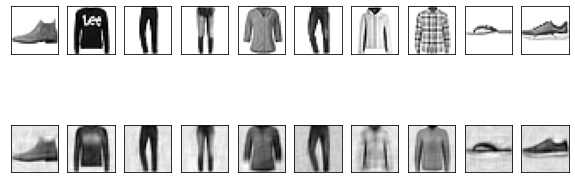

Train Epoch: 10 [0/60000(0%)]	Train Loss: 0.011853
Train Epoch: 10 [6400/60000(11%)]	Train Loss: 0.010579
Train Epoch: 10 [12800/60000(21%)]	Train Loss: 0.009299
Train Epoch: 10 [19200/60000(32%)]	Train Loss: 0.009395
Train Epoch: 10 [25600/60000(43%)]	Train Loss: 0.008914
Train Epoch: 10 [32000/60000(53%)]	Train Loss: 0.007987
Train Epoch: 10 [38400/60000(64%)]	Train Loss: 0.009522
Train Epoch: 10 [44800/60000(75%)]	Train Loss: 0.012420
Train Epoch: 10 [51200/60000(85%)]	Train Loss: 0.010702
Train Epoch: 10 [57600/60000(96%)]	Train Loss: 0.007464

[EPOCH : 6], 	Test Loss: 0.0003


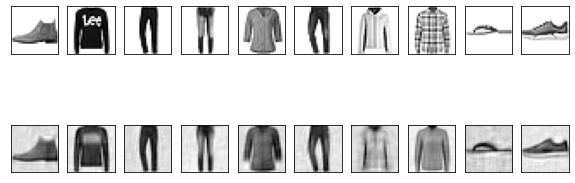

Train Epoch: 10 [0/60000(0%)]	Train Loss: 0.009843
Train Epoch: 10 [6400/60000(11%)]	Train Loss: 0.010424
Train Epoch: 10 [12800/60000(21%)]	Train Loss: 0.009540
Train Epoch: 10 [19200/60000(32%)]	Train Loss: 0.010740
Train Epoch: 10 [25600/60000(43%)]	Train Loss: 0.007216
Train Epoch: 10 [32000/60000(53%)]	Train Loss: 0.007889
Train Epoch: 10 [38400/60000(64%)]	Train Loss: 0.011819
Train Epoch: 10 [44800/60000(75%)]	Train Loss: 0.009976
Train Epoch: 10 [51200/60000(85%)]	Train Loss: 0.010637
Train Epoch: 10 [57600/60000(96%)]	Train Loss: 0.009651

[EPOCH : 7], 	Test Loss: 0.0003


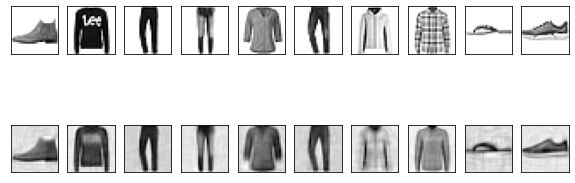

Train Epoch: 10 [0/60000(0%)]	Train Loss: 0.011344
Train Epoch: 10 [6400/60000(11%)]	Train Loss: 0.012060
Train Epoch: 10 [12800/60000(21%)]	Train Loss: 0.009476
Train Epoch: 10 [19200/60000(32%)]	Train Loss: 0.009445
Train Epoch: 10 [25600/60000(43%)]	Train Loss: 0.008969
Train Epoch: 10 [32000/60000(53%)]	Train Loss: 0.009056
Train Epoch: 10 [38400/60000(64%)]	Train Loss: 0.010171
Train Epoch: 10 [44800/60000(75%)]	Train Loss: 0.008033
Train Epoch: 10 [51200/60000(85%)]	Train Loss: 0.011523
Train Epoch: 10 [57600/60000(96%)]	Train Loss: 0.010570

[EPOCH : 8], 	Test Loss: 0.0003


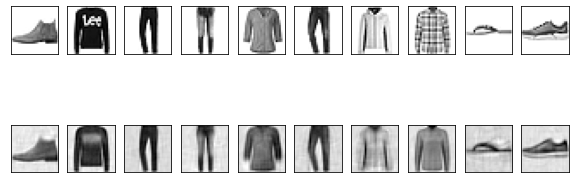

Train Epoch: 10 [0/60000(0%)]	Train Loss: 0.011056
Train Epoch: 10 [6400/60000(11%)]	Train Loss: 0.008708
Train Epoch: 10 [12800/60000(21%)]	Train Loss: 0.008402
Train Epoch: 10 [19200/60000(32%)]	Train Loss: 0.011319
Train Epoch: 10 [25600/60000(43%)]	Train Loss: 0.012546
Train Epoch: 10 [32000/60000(53%)]	Train Loss: 0.009016
Train Epoch: 10 [38400/60000(64%)]	Train Loss: 0.010561
Train Epoch: 10 [44800/60000(75%)]	Train Loss: 0.008169
Train Epoch: 10 [51200/60000(85%)]	Train Loss: 0.010443
Train Epoch: 10 [57600/60000(96%)]	Train Loss: 0.007899

[EPOCH : 9], 	Test Loss: 0.0003


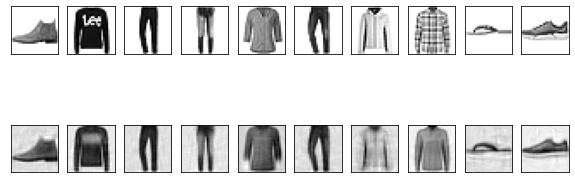

Train Epoch: 10 [0/60000(0%)]	Train Loss: 0.010636
Train Epoch: 10 [6400/60000(11%)]	Train Loss: 0.010732
Train Epoch: 10 [12800/60000(21%)]	Train Loss: 0.011672
Train Epoch: 10 [19200/60000(32%)]	Train Loss: 0.009845
Train Epoch: 10 [25600/60000(43%)]	Train Loss: 0.010918
Train Epoch: 10 [32000/60000(53%)]	Train Loss: 0.010517
Train Epoch: 10 [38400/60000(64%)]	Train Loss: 0.010573
Train Epoch: 10 [44800/60000(75%)]	Train Loss: 0.009851
Train Epoch: 10 [51200/60000(85%)]	Train Loss: 0.009149
Train Epoch: 10 [57600/60000(96%)]	Train Loss: 0.009556

[EPOCH : 10], 	Test Loss: 0.0003


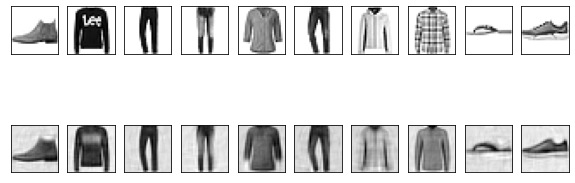

In [93]:
#오토 인코더 학습을 실행하며 test set의 Reconstruction Error 확인하기
for Epoch in range(1, epochs+1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, real_image, gen_image = evaluate(model, test_loader)
    print("\n[EPOCH : {}], \tTest Loss: {:.4f}".format(Epoch, test_loss))
    f, a = plt.subplots(2, 10, figsize=(10,4))
    for i in range(10):
        img = np.reshape(real_image[0][i], (28, 28))
        a[0][i].imshow(img, cmap='gray_r')
        a[0][i].set_xticks(())
        a[0][i].set_yticks(())

    for i in range(10):
        img = np.reshape(gen_image[0][i],(28, 28))
        a[1][i].imshow(img, cmap='gray_r')
        a[1][i].set_xticks(())
        a[1][i].set_yticks(())
    plt.show()